In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from math import pi 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우: 맑은 고딕
# plt.rcParams['font.family'] = 'Nanum Gothic'  # Mac/Linux: 나눔 고딕

# 폰트 크기, 스타일 등 기본값 설정 (선택 사항)
plt.rcParams['axes.unicode_minus'] = False  # 음수(-) 부호가 깨지지 않도록 설정


In [211]:
def count_rows(file_path):
    data = pd.read_csv(file_path)
    return len(data)

# 일산과 분당의 데이터 집계
for region in ['일산', '분당']:
    files = ilsan_files if region == '일산' else bundang_files
    for data_type, file_path in files.items():
        row_count = count_rows(file_path)
        data_dict[region][data_type] = row_count

In [209]:
ilsan_files = {
    '시장': 'C:/Users/saeya/Downloads/dataset_life_infra_일산_시장및마트 (1).csv',
    '대규모점포': "C:/Users/saeya/Downloads/dataset_life_infra_일산_대규모점포_인허가일자포함.csv",
    '음식점': 'C:/Users/saeya/Downloads/dataset_life_infra_일산_일반음식점_인허가일자포함.csv',
    '병원':"C:/Users/saeya/Downloads/dataset_life_infra_일산_병원.csv",
    '학교':"C:/Users/saeya/Downloads/dataset_life_infra_일산_학교.csv",
    '공원':"C:/Users/saeya/Downloads/dataset_life_infra_일산_공원.csv",
    '의원':"C:/Users/saeya/Downloads/dataset_life_infra_일산_의원.csv"
}

bundang_files = {
    '시장': "C:/Users/saeya/Downloads/dataset_life_infra_분당_시장및마트 (1).csv",
    '대규모점포': "C:/Users/saeya/Downloads/dataset_life_infra_분당_대규모점포_인허가일자포함 (1).csv",
    '음식점': "C:/Users/saeya/Downloads/dataset_life_infra_분당_일반음식점_인허가일자포함.csv",
    '병원':"C:/Users/saeya/Downloads/dataset_life_infra_분당_병원 (1).csv",
    '학교':"C:/Users/saeya/Downloads/dataset_life_infra_분당_학교 (1).csv",
    '공원':"C:/Users/saeya/Downloads/dataset_life_infra_분당_공원 (1).csv",
    '의원':"C:/Users/saeya/Downloads/dataset_life_infra_분당_의원 (1).csv"
}

ilsan_market_file = 'C:/Users/saeya/Downloads/dataset_life_infra_일산_시장및마트 (1).csv'
ilsan_mart_file = "C:/Users/saeya/Downloads/dataset_life_infra_일산_대규모점포_인허가일자포함.csv"
ilsan_restaurant_file = 'C:/Users/saeya/Downloads/dataset_life_infra_일산_일반음식점_인허가일자포함.csv'
ilsan_hospital_file = "C:/Users/saeya/Downloads/dataset_life_infra_일산_병원.csv"
ilsan_school_file = "C:/Users/saeya/Downloads/dataset_life_infra_일산_학교.csv"
ilsan_park_file="C:/Users/saeya/Downloads/dataset_life_infra_일산_공원.csv"
ilsan_hospital2_file="C:/Users/saeya/Downloads/dataset_life_infra_일산_의원.csv"


bundang_market_file = "C:/Users/saeya/Downloads/dataset_life_infra_분당_시장및마트 (1).csv"
bundang_mart_file = "C:/Users/saeya/Downloads/dataset_life_infra_분당_대규모점포_인허가일자포함 (1).csv"
bundang_restaurant_file ="C:/Users/saeya/Downloads/dataset_life_infra_분당_일반음식점_인허가일자포함.csv"
bundang_hospital_file = "C:/Users/saeya/Downloads/dataset_life_infra_분당_병원 (1).csv"
bundang_school_file = "C:/Users/saeya/Downloads/dataset_life_infra_분당_학교 (1).csv"
bundang_park_file="C:/Users/saeya/Downloads/dataset_life_infra_분당_공원 (1).csv"
bundang_hospital2_file="C:/Users/saeya/Downloads/dataset_life_infra_분당_의원 (1).csv"


ilsan_market_data = pd.read_csv(ilsan_market_file)
ilsan_mart_data = pd.read_csv(ilsan_mart_file)
ilsan_restaurant_data = pd.read_csv(ilsan_restaurant_file)
ilsan_hospital_data = pd.read_csv(ilsan_hospital_file)
ilsan_school_data = pd.read_csv(ilsan_school_file)
ilsan_park_data = pd.read_csv(ilsan_park_file)
ilsan_hospital2_data = pd.read_csv(ilsan_hospital2_file)

bundang_market_data = pd.read_csv(bundang_market_file)
bundang_mart_data = pd.read_csv(bundang_mart_file)
bundang_restaurant_data = pd.read_csv(bundang_restaurant_file)
bundang_hospital_data = pd.read_csv(bundang_hospital_file)
bundang_school_data = pd.read_csv(bundang_school_file)
bundang_park_data = pd.read_csv(bundang_park_file)
bundang_hospital2_data= pd.read_csv(bundang_hospital2_file)


# 데이터 저장
data_dict = {
    '일산': {'시장': 0, '대규모점포': 0, '음식점': 0, '병원':0, '학교':0, '공원':0, '의원':0},
    '분당': {'시장': 0, '대규모점포': 0, '음식점': 0,'병원': 0, '학교':0, '공원':0, '의원':0}
}

#print(data_dict)

In [213]:

ilsan_mart_data['폐업일자'] = pd.to_datetime(ilsan_mart_data['폐업일자'].astype(str).str.replace('-', ''), errors='coerce')

In [243]:

def count_without_closing_date(file_path):

    df = pd.read_csv(file_path)
    
    # '폐업일자'가 없는 경우 처리
    if '폐업일자' in df.columns:
        df = df[df['폐업일자'].isna()]  # 폐업일자가 없는 데이터만 필터링

    # '영업상태'와 '상세영업상태명' 조건 추가
    if '영업상태명' in df.columns:
        df = df[(df['영업상태명'] == '정상영업') | (df['영업상태명'] == '영업개시전') | (df['영업상태명'] == '영업')]
        

    if '상세영업상태명' in df.columns:
        df = df[(df['상세영업상태명'] == '정상영업') | (df['상세영업상태명'] == '영업개시전') | (df['상세영업상태명'] == '영업중') | (df['상세영업상태명'] == '영업')]

    # 필터링된 데이터 표시 및 개수 반환
    display(df)
    return df.shape[0]

# 데이터 파일 경로(일산, 분당)를 기반으로 결과 계산
ilsan_counts = {
    '시장': count_without_closing_date(ilsan_files['시장']),
    '대규모점포': count_without_closing_date(ilsan_files['대규모점포']),
    '음식점': count_without_closing_date(ilsan_files['음식점']),
    '병원': count_without_closing_date(ilsan_files['병원']),
    '학교': count_without_closing_date(ilsan_files['학교']),
    '공원': count_without_closing_date(ilsan_files['공원']),
    '의원': count_without_closing_date(ilsan_files['의원'])
}

bundang_counts = {
    '시장': count_without_closing_date(bundang_files['시장']),
    '대규모점포': count_without_closing_date(bundang_files['대규모점포']),
    '음식점': count_without_closing_date(bundang_files['음식점']),
    '병원': count_without_closing_date(bundang_files['병원']),
    '학교': count_without_closing_date(bundang_files['학교']),
    '공원': count_without_closing_date(bundang_files['공원']),
    '의원': count_without_closing_date(bundang_files['의원'])
}

# 결과 출력
print("일산의 개수 (폐업 제외):", ilsan_counts)
print("분당의 개수 (폐업 제외):", bundang_counts)


,Unnamed: 0,시설구분명,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도
0,0,로컬푸드직매장,경기도 고양시 일산동구 장항로 226-68,경기도 고양시 일산동구 장항동 594번지,37.642994,126.777651
1,1,로컬푸드직매장,경기도 고양시 일산서구 일산로 640,경기도 고양시 일산서구 대화동 2032-2번지,37.682180,126.758286
2,2,로컬푸드직매장,경기도 고양시 일산동구 태극로 8,경기도 고양시 일산동구 장항동 1753번지 킨텍스원시티,37.663592,126.749219
3,3,전통시장,경기도 고양시 일산서구 일청로 12번길 9,경기도 고양시 일산서구 일산동 617-20,37.685623,126.770826
4,4,로컬푸드직매장,경기도 고양시 일산동구 숲속마을1로 34,경기도 고양시 일산동구 풍동 349-13번지,37.663956,126.799602
5,5,로컬푸드직매장,경기도 고양시 일산서구 일청로 30,경기도 고양시 일산서구 일산동 594-28번지,37.686616,126.771387
6,6,전통시장,경기도 고양시 일산서구 덕이동 탄중로101번길 13,경기도 고양시 일산서구 덕이동 384-1,37.693021,126.755787


,Unnamed: 0,사업장명,영업상태명,인허가일자,폐업일자,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도,업태구분명정보
0,0,라 몬테 이탈리아노,영업개시전,2019-01-22,NaN,"경기도 고양시 일산동구 연리지로 51, 라몬테이탈리아노 (장항동)",경기도 고양시 일산동구 장항동 1800번지 라몬테이탈리아노,37.659901,126.754939,그 밖의 대규모점포
1,1,GIFC MALL,영업개시전,2019-01-23,NaN,경기도 고양시 일산서구 킨텍스로 240 (대화동),경기도 고양시 일산서구 대화동 2603번지,37.666098,126.750520,그 밖의 대규모점포
2,2,고양 일산 호수공원 가로수길,영업개시전,2017-08-25,NaN,경기도 고양시 일산서구 주엽로 80 (대화동),경기도 고양시 일산서구 대화동 1050번지 185호,37.665939,126.756403,그 밖의 대규모점포
3,3,일산 벨라씨타(Bella Citta),영업개시전,2016-08-26,NaN,"경기도 고양시 일산동구 강송로 33 (백석동, 일산요진와이시티)",경기도 고양시 일산동구 백석동 1237번지,37.642359,126.792682,쇼핑센터
4,4,레이킨스몰,정상영업,2010-08-26,NaN,경기도 고양시 일산서구 호수로 817 (대화동),경기도 고양시 일산서구 대화동 2602번지,37.667964,126.751387,그 밖의 대규모점포
5,5,포리치,정상영업,1998-06-13,NaN,경기도 고양시 일산서구 중앙로 1376 (주엽동),경기도 고양시 일산서구 주엽동 75번지,37.667321,126.767019,그 밖의 대규모점포
6,6,홈플러스(주) 고양터미널점,정상영업,2011-06-15,NaN,경기도 고양시 일산동구 중앙로 1036-0 (백석동),경기도 고양시 일산동구 백석동 1242번지,37.643193,126.789720,대형마트
7,7,롯데쇼핑(주) 롯데마트 주엽점,정상영업,2000-01-10,NaN,"경기도 고양시 일산서구 중앙로 1496 (주엽동, 문촌마을11단지아파트)",경기도 고양시 일산서구 주엽동 15호,37.673157,126.755212,대형마트
8,8,현대백화점 킨텍스점,정상영업,2010-07-13,NaN,경기도 고양시 일산서구 호수로 817 (대화동),경기도 고양시 일산서구 대화동 2602번지,37.667979,126.751624,백화점
9,9,뉴삼창마트,정상영업,1996-12-31,NaN,NaN,"경기도 고양시 일산동구 마두동 802,3호",37.651875,126.778808,그 밖의 대규모점포


,Unnamed: 0,사업장명,소재지도로명주소,소재지지번주소,위도,경도,영업상태명,인허가일자,폐업일자,업태구분명정보
3,3,(GoGo)고고비어,"경기도 고양시 일산서구 대화로 136, 114호 (대화동, 대성프라자)",경기도 고양시 일산서구 대화동 863-3번지 대성프라자 114호,37.670271,126.735046,영업,2009-03-04,NaN,한식
11,11,(신)산동반점,"경기도 고양시 일산서구 일산로741번길 5-15 (대화동,번지 (1층))",경기도 고양시 일산서구 대화동 2194 번지 (1층),37.677684,126.751357,영업,2002-01-22,NaN,기타
12,12,(신)헝그리웍,"경기도 고양시 일산서구 가좌로 34-4 (가좌동,1층 일부)",경기도 고양시 일산서구 가좌동 461-14 1층 일부,37.691900,126.722404,영업,2008-02-14,NaN,중국식
13,13,(오늘도)육해공,경기도 고양시 일산동구 탄중로431번길 8-9 (중산동),경기도 고양시 일산동구 중산동 1590-6,37.686765,126.778088,영업,2000-05-19,NaN,한식
14,14,(유)아웃백스테이크하우스코리아 원마운트점,"경기도 고양시 일산서구 한류월드로 300, 2023~2027호 (대화동, 고양원마운트)",경기도 고양시 일산서구 대화동 2606 고양원마운트 2023~2027호,37.664554,126.754527,영업,2013-06-05,NaN,경양식
...,...,...,...,...,...,...,...,...,...,...
22072,22072,힐사이드,경기도 고양시 일산동구 성석로 237-3 (성석동),경기도 고양시 일산동구 성석동 641-7,37.698288,126.798156,영업,2001-08-02,NaN,경양식
22076,22076,힘쎈통통이닭발,"경기도 고양시 일산서구 일중로 83, 1층 일부호 (일산동)",경기도 고양시 일산서구 일산동 587-39 1칭 일부호,37.686907,126.774843,영업,2020-04-03,NaN,한식
22078,22078,힙포,"경기도 고양시 일산동구 고봉로 771, 1층 일부호 (설문동)",경기도 고양시 일산동구 설문동 705-39,37.724745,126.792744,영업,2021-01-29,NaN,기타
22079,22079,힙포 일산벨라시타점,"경기도 고양시 일산동구 강송로 33, 2층 일부호 (백석동, 일산 요진 와이시티)",경기도 고양시 일산동구 백석동 1237 일산 요진 와이시티 2층 일부호(A-2202...,37.641454,126.791301,영업,2024-10-16,NaN,"외국음식전문점(인도,태국등)"


,Unnamed: 0,상세영업상태명,인허가일자,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,의료인수,입원실수,병상수,진료과목내용명,위도,경도
0,0,영업중,2007-01-24,NaN,경기도 고양시 일산서구 주엽동 21 사과나무치과병원,"경기도 고양시 일산서구 중앙로 1450, 사과나무치과병원 2~7층 (주엽동)",사과나무치과병원,치과병원,25,0,0,"내과, 가정의학과, 구강악안면외과, 치과보철과, 치과교정과, 소아치과, 치주과, 치...",37.671268,126.759604
1,1,영업중,2008-07-11,NaN,"경기도 고양시 일산동구 중산동 1696 지하1층 일부, 1층 일부, 2~5층","경기도 고양시 일산동구 중산로 117, 지하1층 일부, 1층 일부, 2~5층 (중산동)",해븐리병원,병원,37,40,178,"내과, 신경과, 정형외과, 영상의학과, 재활의학과, 가정의학과",37.682541,126.781049
2,2,영업중,2008-08-14,NaN,NaN,"경기도 고양시 일산서구 주화로 88 (주엽동, 효림빌딩 201호, 205~6호, 3...",효림요양병원,요양병원(일반요양병원),20,29,150,"내과, 신경과, 외과, 피부과, 재활의학과, 가정의학과, 한방내과, 한방신경정신과,...",37.670554,126.758525
3,3,영업중,2009-03-31,NaN,NaN,"경기도 고양시 일산서구 덕이로 212 (덕이동, 백송프라자 3,4층 일부)",무지개요양병원,요양병원(일반요양병원),41,49,280,"가정의학과, 한방내과",37.696692,126.739335
4,4,영업중,2009-04-29,NaN,"경기도 고양시 일산서구 일산2동 554번지 4호 일산마샬빌딩 4,5,6,7,8층","경기도 고양시 일산서구 일중로 59 (일산동, 일산마샬빌딩 4,5,6,7,8층)",로하스일산병원,병원,48,31,112,"내과, 재활의학과, 가정의학과, 한방내과",37.684972,126.775199
5,5,영업중,2012-08-17,NaN,경기도 고양시 일산동구 중산동 1695번지,경기도 고양시 일산동구 고양대로 761 (중산동),일산하이병원,병원,26,18,76,"내과, 정형외과, 신경외과, 마취통증의학과, 영상의학과",37.682558,126.780620
6,6,영업중,2014-05-09,NaN,NaN,"경기도 고양시 일산동구 중앙로 1059 (백석동, ISD빌딩 3~8층)",일산이십일세기병원,병원,32,18,91,"내과, 정형외과, 신경외과, 마취통증의학과, 영상의학과",37.643926,126.786164
7,7,영업중,2014-10-17,NaN,"경기도 고양시 일산서구 주엽동 66번지 일산삼희프라자301~6호,309~11호,40...","경기도 고양시 일산서구 강성로 121 (주엽동, 삼희프라자301~6호,309~11호...",연세항맥병원,병원,8,17,46,"내과, 외과",37.670568,126.762158
8,8,영업중,2014-10-30,NaN,경기도 고양시 일산동구 식사동 1588번지 동국타워 5~8층,"경기도 고양시 일산동구 위시티로 18, 5~8층 (식사동, 동국타워)",일산리더스요양병원,요양병원(일반요양병원),13,24,128,"내과, 가정의학과, 한방내과, 침구과",37.674549,126.807547
9,9,영업중,2015-06-29,NaN,NaN,"경기도 고양시 일산동구 성현로29번길 28-9, 지하1층, 1층~4층 (성석동)",다스람요양병원,요양병원(일반요양병원),22,47,89,"내과, 외과, 재활의학과, 가정의학과, 한방내과, 침구과",37.711993,126.791200


,Unnamed: 0,학교명,학교급구분,설립일자,설립형태,운영상태,소재지지번주소,소재지도로명주소,시도교육청명,위도,경도
0,0,신일비즈니스고등학교,고등학교,1996-03-01,공립,운영,경기도 고양시 일산서구 일산동 1041,경기도 고양시 일산서구 킨텍스로 452,경기도교육청,37.683058,126.762179
1,1,백마고등학교,고등학교,2017-05-04,공립,운영,경기도 고양시 일산동구 백석동 1138,경기도 고양시 일산동구 백석로 155,경기도교육청,37.651982,126.794012
2,2,고양예술고등학교,고등학교,2005-10-12,사립,운영,경기도 고양시 일산서구 덕이동 753-11,경기도 고양시 일산서구 덕이로172번길 4-39,경기도교육청,37.697410,126.742303
3,3,한류초등학교,초등학교,2019-09-01,공립,운영,경기도 고양시 일산동구 장항동 1779,경기도 고양시 일산동구 한류월드로 262,경기도교육청,37.662268,126.756958
4,4,백송고등학교,고등학교,1974-01-05,사립,운영,경기도 고양시 일산서구 덕이동 753-11,경기도 고양시 일산서구 덕이로 172번길 4-39,경기도교육청,37.697410,126.742303
...,...,...,...,...,...,...,...,...,...,...,...
91,91,송포초등학교,초등학교,1935-01-25,공립,운영,경기도 고양시 일산서구 가좌동 355-1,경기도 고양시 일산서구 송산로 379,경기도교육청,37.685401,126.720540
92,92,대화중학교,중학교,1995-06-05,공립,운영,경기도 고양시 일산서구 대화동 2230,경기도 고양시 일산서구 고양대로 348,경기도교육청,37.673814,126.744477
93,93,성저초등학교,초등학교,1995-09-01,공립,운영,경기도 고양시 일산서구 대화동 2006,경기도 고양시 일산서구 성저로 92,경기도교육청,37.684745,126.757365
94,94,일산고등학교,고등학교,1956-05-04,공립,운영,경기도 고양시 일산서구 일산동 966-50,경기도 고양시 일산서구 원일로 53,경기도교육청,37.688972,126.768338


,Unnamed: 0,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적(㎡)
0,0,오마,어린이공원,경기도 고양시 일산서구 주엽로 220-4,경기도 고양시 일산서구 주엽동 34번지,37.676064,126.764584,5700.0
1,1,식사(은행마을공원),근린공원,경기도 고양시 일산동구 은행마을로 80-4,경기도 고양시 일산동구 식사동 1475번지,37.669891,126.806486,10000.0
2,2,하늘장미(일산2-5),어린이공원,경기도 고양시 일산동구 하늘마을로 102-2,경기도 고양시 일산동구 중산동 1702번지,37.680478,126.784715,1500.0
3,3,안곡습지,수변공원,경기도 고양시 일산동구 하늘마을로 39-5,경기도 고양시 일산동구 중산동 1712번지,37.684019,126.784489,77829.0
4,4,개나리(일산2-4),어린이공원,경기도 고양시 일산동구 소개울2길 43,경기도 고양시 일산동구 중산동 1736번지,37.683828,126.790138,1885.0
...,...,...,...,...,...,...,...,...
132,132,정발산,근린공원,NaN,경기도 고양시 일산동구 마두동 819,37.663265,126.779229,644650.0
133,133,안산,문화공원,경기도 고양시 일산동구 백석로 57-2,경기도 고양시 일산동구 백석동 1195번지,37.646138,126.784716,8437.0
134,134,알미,근린공원,경기도 고양시 일산동구 중앙로 1087-2,경기도 고양시 일산동구 백석동 1350번지,37.645502,126.783940,15507.0
135,135,호수,근린공원,경기도 고양시 일산동구 호수로 543-2,경기도 고양시 일산동구 장항동 905번지,37.650895,126.771271,107849.0


,Unnamed: 0,상세영업상태명,인허가일자,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,의료인수,입원실수,병상수,진료과목내용명,위도,경도
0,0,영업중,2019-03-06,NaN,경기도 고양시 일산동구 중산동 1667번지 8호,"경기도 고양시 일산동구 고봉로 266, 5층 (중산동)",미래마취통증의학과의원,의원,2.0,0.0,0.0,"정형외과, 신경외과, 마취통증의학과, 재활의학과",37.683572,126.778153
1,1,영업중,2019-03-08,NaN,NaN,"경기도 고양시 일산동구 정발산로 38, 장항동이스턴시티 207호 (장항동)",마음미소정신건강의학과의원,의원,1.0,0.0,0.0,정신건강의학과,37.656715,126.773131
2,2,영업중,2019-03-15,NaN,NaN,"경기도 고양시 일산동구 강송로 119, 용신코아 3층 302호 (백석동)",이재한의원,한의원,1.0,0.0,0.0,"한방내과, 한방부인과, 한방소아과, 한방안·이비인후·피부과, 한방신경정신과, 한방재...",37.649577,126.786089
3,3,영업중,2019-01-28,NaN,NaN,"경기도 고양시 일산동구 정발산로 38, 장항동이스턴시티 208호 일부, 408호 (...",정발산튼튼척의원,의원,3.0,0.0,0.0,"외과, 정형외과, 마취통증의학과, 재활의학과",37.656715,126.773131
4,4,영업중,2019-02-18,NaN,NaN,"경기도 고양시 일산동구 중산로 244, 고은프라자 3층 301호 (중산동)",열린부부한의원,한의원,1.0,0.0,0.0,"한방내과, 한방부인과, 한방소아과, 한방안·이비인후·피부과, 한방신경정신과, 한방재...",37.693742,126.780882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,732,영업중,2021-01-26,NaN,경기도 고양시 일산동구 장항동 864 메트로골드,"경기도 고양시 일산동구 중앙로1261번길 61, 메트로골드(8층일부, 9층) (장항동)",치유본한의원,한의원,5.0,26.0,27.0,"한방내과, 한방부인과, 한방소아과, 한방안·이비인후·피부과, 한방신경정신과, 한방재...",37.657385,126.770256
733,733,영업중,2021-01-07,NaN,경기도 고양시 일산서구 일산동 955,"경기도 고양시 일산서구 고양대로 632, 아카메디 3층 305호 (일산동)",올바른치과의원,치과의원,1.0,0.0,0.0,"구강악안면외과, 치과보철과, 치과교정과, 소아치과, 치주과, 치과보존과, 구강내과,...",37.685476,126.766283
734,734,영업중,2020-12-09,NaN,경기도 고양시 일산서구 주엽동 105 주엽역 삼부르네상스,"경기도 고양시 일산서구 중앙로 1425, 주엽역 삼부르네상스 가동 201호, 303...",배편한내과의원,의원,3.0,0.0,0.0,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 마취통증의학과, 산부인과, 소아청...",37.669031,126.761876
735,735,영업중,2021-01-26,NaN,NaN,"경기도 고양시 일산동구 숲속마을로 44, 풍동 미래타워 3층 302호 (풍동)",연한의원,한의원,1.0,0.0,0.0,"한방내과, 한방부인과, 한방소아과, 한방안·이비인후·피부과, 한방신경정신과, 한방재...",37.667412,126.798259


,Unnamed: 0.1,Unnamed: 0,시설구분명,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도
0,0,0,전통시장,경기도 성남시 분당구 불정로386번길 10 서현동 효자촌미래타운아파트,경기도 성남시 분당구 서현동 307,37.373416,127.138036
1,1,1,전통시장,경기도 성남시 분당구 불정로376번길 31,경기도 성남시 분당구 서현동 311,37.372255,127.138871
2,2,2,전통시장,경기도 성남시 분당구 불정로376번길 37 서현동,경기도 성남시 분당구 서현동 312-3,37.371629,127.139444
3,3,3,전통시장,경기도 성남시 분당구 내정로165번길 38,경기도 성남시 분당구수내동 32,37.376661,127.116239
4,4,4,전통시장,경기도 성남시 분당구 내정로 165번길 38,경기도 성남시 분당구 수내동 32,37.376661,127.116239
5,5,5,전통시장,경기도 성남시 분당구 수내동 돌마로 361,경기도 성남시 분당구 수내동 돌마로 361,37.370623,127.122966
6,6,6,전통시장,경기도 성남시 분당구 내정로174번길 42 파크타운서안아파트,경기도 성남시 분당구 수내동 53,37.371531,127.122168
7,7,7,전통시장,경기도 성남시 분당구 돌마로 366번길 42,경기도 성남시 분당구 수내동 83,37.367180,127.126749
8,8,8,전통시장,경기도 성남시 분당구 야탑로 64,경기도 성남시 분당구 야탑동 502,37.409503,127.125979
9,9,9,전통시장,경기도 성남시 분당구 돌마로90번길 8,경기도 성남시 분당구 구미동 26-1,37.349284,127.111774


,Unnamed: 0.1,Unnamed: 0,사업장명,영업상태명,인허가일자,폐업일자,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도,업태구분명정보
0,0,0,GS THE FRESH 분당이매역점,영업개시전,2023-11-08,NaN,"경기도 성남시 분당구 이매로 45, 이수프라자 (이매동)",경기도 성남시 분당구 이매동 115-2 이수프라자,37.394981,127.125889,그 밖의 대규모점포
1,2,2,돌고래시장,정상영업,1996-12-20,NaN,경기도 성남시 분당구 내정로174번길 42 (수내동),경기도 성남시 분당구 수내동 53호,37.371197,127.122076,시장
2,3,3,미래타운제2종합시장,정상영업,1994-12-02,NaN,경기도 성남시 분당구 불정로376번길 31 (서현동),경기도 성남시 분당구 서현동 311호,37.372287,127.138910,그 밖의 대규모점포
3,4,4,"테마폴리스 지상1,2층",정상영업,2005-05-27,NaN,"경기도 성남시 분당구 성남대로925번길 16 (야탑동,테마폴리스 지상1,2층)","경기도 성남시 분당구 야탑동 341번지 테마폴리스 지상1,2층",37.413026,127.127214,그 밖의 대규모점포
4,5,5,테마폴리스 지하2층점,정상영업,2005-07-25,NaN,경기도 성남시 분당구 성남대로925번길 16 (야탑동),경기도 성남시 분당구 야탑동 341호,37.413026,127.127214,그 밖의 대규모점포
5,6,6,야탑에이스코아시장,정상영업,1997-08-29,NaN,경기도 성남시 분당구 야탑로 64 (야탑동),경기도 성남시 분당구 야탑동 502호,37.409387,127.125739,시장
6,7,7,홈플러스(주) 야탑점,정상영업,2000-04-01,NaN,경기도 성남시 분당구 성남대로925번길 16 (야탑동),경기도 성남시 분당구 야탑동 341호,37.413094,127.127246,대형마트
7,8,8,이천일아울렛 분당점,정상영업,2002-04-20,NaN,"경기도 성남시 분당구 미금일로154번길 20, 2001아울렛 (구미동)",경기도 성남시 분당구 구미동 11번지 4호 2001아울렛,37.349077,127.107465,복합쇼핑몰
8,9,9,분당 현대시장,정상영업,1992-07-03,NaN,경기도 성남시 분당구 중앙공원로40번길 8 (서현동),경기도 성남시 분당구 서현동 94번지,37.379640,127.130151,시장
9,10,10,동신종합시장,정상영업,1993-07-14,NaN,경기도 성남시 분당구 돌마로 361 (수내동),경기도 성남시 분당구 수내동 63번지 2 호,37.370530,127.122876,그 밖의 대규모점포


,Unnamed: 0.1,Unnamed: 0,사업장명,소재지도로명주소,소재지지번주소,위도,경도,영업상태명,인허가일자,폐업일자,업태구분명정보
0,0,0,#그술집,"경기도 성남시 분당구 매화로37번길 16 (야탑동, 1층)",경기도 성남시 분당구 야탑동 383-8 1층,37.411688,127.133038,영업,2005-07-01,NaN,경양식
4,6,9,(유)아웃백스테이크하우스코리아 분당AK점,"경기도 성남시 분당구 황새울로360번길 42, AK플라자 5층 일부호 (서현동)",경기도 성남시 분당구 서현동 263 AK플라자 5층 일부호,37.385101,127.122708,영업,2002-09-18,NaN,경양식
5,8,11,(제이)J영커머스,"경기도 성남시 분당구 정자일로 220, 1층 115호 (정자동, 동양정자파라곤)",경기도 성남시 분당구 정자동 14-1 동양정자파라곤 1층 115호,37.369427,127.106489,영업,2022-04-26,NaN,기타
6,9,17,(주)가비양,"경기도 성남시 분당구 안골로 33 (서현동,1층)",경기도 성남시 분당구 서현동 182-1 1층,37.385789,127.135107,영업,2002-05-10,NaN,기타
7,10,18,(주)거궁찬스 정자점,"경기도 성남시 분당구 정자일로 210, 1층 116호 (정자동, 동양정자파라곤)",경기도 성남시 분당구 정자동 14-3 동양정자파라곤 1층 116호,37.368751,127.106493,영업,2024-05-02,NaN,한식
...,...,...,...,...,...,...,...,...,...,...,...
10760,13860,29073,히카리,"경기도 성남시 분당구 성남대로331번길 3-9 (정자동, 백궁프라자 3층 305호)",경기도 성남시 분당구 정자동 156-2 백궁프라자 3층 305호,37.364843,127.107699,영업,2012-04-26,NaN,기타
10762,13862,29075,히토미즈,"경기도 성남시 분당구 불정로 255, 돌마소매시장 1층 103호 (수내동)",경기도 성남시 분당구 수내동 83-3 돌마소매시장 1층 103호,37.366932,127.126424,영업,2024-02-07,NaN,일식
10770,13872,29091,힘난다버거 미금점,"경기도 성남시 분당구 성남대로 165, 천사의도시1 오피스텔 1층 근107호 (금곡동)",경기도 성남시 분당구 금곡동 161 천사의도시1 오피스텔 근107호,37.350765,127.108314,영업,2022-02-16,NaN,경양식
10771,13873,29092,힘난다버거 분당수내점,"경기도 성남시 분당구 황새울로258번길 36, 광진프라자 1층 102호 (수내동)",경기도 성남시 분당구 수내동 7-8 광진프라자 1층 102호,37.379183,127.115746,영업,2021-10-14,NaN,경양식


,Unnamed: 0.1,Unnamed: 0,상세영업상태명,인허가일자,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,의료인수,입원실수,병상수,진료과목내용명,위도,경도
10,10,10,영업중,2012-06-05,NaN,경기도 성남시 분당구 서현동 306번지 5호 1층(일부)∼4층,"경기도 성남시 분당구 불정로386번길 8, 1층일부~4층 (서현동)",카리스요양병원,요양병원(일반요양병원),19,18,114,"내과, 신경과, 정형외과, 신경외과, 재활의학과, 가정의학과",37.373954,127.136844
11,11,11,영업중,2012-07-13,NaN,"경기도 성남시 분당구 야탑동 361번지 5호 야탑 대덕프라자 701호, 801호","경기도 성남시 분당구 성남대로926번길 6, 701,801호 (야탑동, 야탑대덕프라자)",분당베스트병원,병원,49,29,149,"재활의학과, 한방내과, 한방부인과, 한방소아과, 한방안·이비인후·피부과, 한방신경정...",37.368678,127.108043
12,13,13,영업중,2010-01-11,NaN,경기도 성남시 분당구 야탑동 360-5,"경기도 성남시 분당구 성남대로 932, 1~9층 (야탑동)",분당척병원,병원,84,20,81,"정형외과, 신경외과, 마취통증의학과, 영상의학과, 재활의학과, 가정의학과",37.412882,127.129275
13,14,14,영업중,2009-01-05,NaN,NaN,"경기도 성남시 분당구 양현로375번길 31, 지하1층,1,2,3층 (야탑동)",분당연세요양병원,요양병원(일반요양병원),59,41,231,"내과, 재활의학과, 가정의학과, 침구과",37.416076,127.120888
14,15,15,영업중,2011-03-25,NaN,NaN,"경기도 성남시 분당구 황새울로319번길 13, 1~6층 (서현동)",분당자생한방병원,한방병원,49,13,70,"내과, 영상의학과, 한방내과, 한방부인과, 한방신경정신과, 한방재활의학과, 사상체질...",37.379383,127.113275
15,16,16,영업중,2017-11-10,NaN,경기도 성남시 분당구 이매동 120번지 5호 지1층~5층,"경기도 성남시 분당구 양현로94번길 17, 지1층~5층 (이매동)",분당센트럴요양병원,요양병원(일반요양병원),26,41,170,"내과, 신경과, 재활의학과, 가정의학과, 한방내과, 한방부인과, 한방재활의학과, 사...",37.387706,127.120312
16,18,18,영업중,2024-02-20,NaN,경기도 성남시 분당구 야탑동 366-1 관보골든쇼핑스포츠빌딩,"경기도 성남시 분당구 성남대로916번길 5, 관보골든쇼핑스포츠빌딩 4층 (야탑동)",365매일한방병원,한방병원,13,11,41,"재활의학과, 가정의학과, 한방내과, 한방부인과, 한방소아과, 한방안·이비인후·피부과...",37.411648,127.129862
17,19,19,영업중,1900-01-01,NaN,경기도 성남시 분당구 금곡동 157 금산젬월드,"경기도 성남시 분당구 돌마로 67, 금산젬월드 6, 8층 (금곡동)",분당나로한방병원,한방병원,47,31,88,"정형외과, 한방내과, 한방부인과, 한방소아과, 한방안·이비인후·피부과, 한방신경정신...",37.350496,127.109508
18,20,20,영업중,1997-10-17,NaN,경기도 성남시 분당구 구미동 205번지 4호,경기도 성남시 분당구 미금로 40 (구미동),형치과병원,치과병원,6,0,0,"구강악안면외과, 치과보철과, 치과교정과, 소아치과, 치주과, 치과보존과, 구강내과,...",37.337024,127.116602
19,21,21,영업중,1998-03-28,NaN,경기도 성남시분당구 서현동 255번지 2호,경기도 성남시 분당구 서현로180번길 20 (서현동),대진의료재단 분당제생병원,종합병원,760,147,516,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 심장혈관흉부외과, 성형...",37.370415,127.147796


,Unnamed: 0.1,Unnamed: 0,학교명,학교급구분,설립일자,설립형태,운영상태,소재지지번주소,소재지도로명주소,시도교육청명,위도,경도
0,1,1,수내초등학교,초등학교,1993-01-11,공립,운영,경기도 성남시 분당구 수내동 81,경기도 성남시 분당구 백현로243번길 12,경기도교육청,37.367766,127.124663
1,3,3,서현초등학교,초등학교,1991-09-01,공립,운영,경기도 성남시 분당구 서현동 87-1,경기도 성남시 분당구 중앙공원로39번길 12,경기도교육청,37.382576,127.128550
2,6,6,한솔고등학교,고등학교,1994-11-01,공립,운영,경기도 성남시 분당구 정자동 115,경기도 성남시 분당구 내정로 70,경기도교육청,37.366776,127.115688
3,7,7,분당초등학교,초등학교,1954-11-20,공립,운영,경기도 성남시 분당구 서현동 92-1,경기도 성남시 분당구 중앙공원로32번길 20,경기도교육청,37.378988,127.129697
4,8,8,송림고등학교,고등학교,1975-03-01,사립,운영,경기도 성남시 분당구 이매동 378,경기도 성남시 분당구 이매로 100,경기도교육청,37.391913,127.131810
...,...,...,...,...,...,...,...,...,...,...,...,...
60,83,83,태원고등학교,고등학교,1987-03-05,사립,운영,경기도 성남시 분당구 야탑동 754-1,경기도 성남시 분당구 성남대로 822,경기도교육청,37.403916,127.129021
61,84,84,백현중학교,중학교,1995-03-01,공립,운영,경기도 성남시 분당구 정자동 77,경기도 성남시 분당구 황새울로 124,경기도교육청,37.371320,127.110662
62,85,85,서당초등학교,초등학교,1993-03-01,공립,운영,경기도 성남시 분당구 서현동 303,경기도 성남시 분당구 돌마로476번길 30,경기도교육청,37.374602,127.134589
63,86,86,늘푸른초등학교,초등학교,2003-01-13,공립,운영,경기도 성남시 분당구 정자동 178-5,경기도 성남시 분당구 정자일로 87,경기도교육청,37.358334,127.105671


,Unnamed: 0.1,Unnamed: 0,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적(㎡)
0,2,2,미래공원,어린이공원,NaN,경기도 성남시 분당구 서현동 309,37.371048,127.136006,3509.7
1,3,3,양촌공원,어린이공원,NaN,경기도 성남시 분당구 야탑동 178,37.407056,127.147037,1533.2
2,5,5,구미공원,어린이공원,NaN,경기도 성남시 분당구 구미동 206,37.337391,127.117303,8656.6
3,6,6,야생화공원,어린이공원,NaN,경기도 성남시 분당구 금곡동 175,37.351585,127.106626,1756.6
4,9,9,철쭉공원,어린이공원,NaN,경기도 성남시 분당구 정자동 108,37.366541,127.122169,7944.2
...,...,...,...,...,...,...,...,...,...
93,116,116,양영공원,어린이공원,NaN,경기도 성남시 분당구 서현동 317-1,37.373422,127.139348,5344.5
94,117,117,수련공원,어린이공원,NaN,경기도 성남시 분당구 서현동 314-1,37.372455,127.140537,1509.9
95,118,118,구미공원,근린공원,경기도 성남시 분당구 금곡로 90,경기도 성남시 분당구 구미동 299,37.342138,127.121929,226188.2
96,126,126,맹산2공원,근린공원,경기도 성남시 분당구 판교로 628,경기도 성남시 분당구 야탑동422-3,37.405244,127.142019,549878.6


,Unnamed: 0.1,Unnamed: 0,상세영업상태명,인허가일자,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,의료인수,입원실수,병상수,진료과목내용명,위도,경도
574,616,616,영업중,2021-01-13,NaN,경기도 성남시 분당구 정자동 180 미켈란쉐르빌,"경기도 성남시 분당구 정자일로 100, 2층 206, 207호 (정자동, 미켈란쉐르빌)",분당성모이비인후과의원,의원,1.0,0.0,0.0,"내과, 신경과, 외과, 성형외과, 소아청소년과, 이비인후과, 피부과",37.359092,127.106996
584,626,626,영업중,2023-11-02,NaN,NaN,"경기도 성남시 분당구 돌마로 52, MD프라자 201호 (구미동)",분당바른의원,의원,1.0,0.0,0.0,"외과, 정형외과, 신경외과, 마취통증의학과, 재활의학과",37.349681,127.107750
585,627,627,영업중,2023-11-07,NaN,경기도 성남시 분당구 금곡동 157 금산젬월드,"경기도 성남시 분당구 돌마로 67, 금산젬월드 103호 (금곡동)",미금더튼튼의원,의원,2.0,0.0,0.0,정형외과,37.350496,127.109508
586,628,628,영업중,2023-09-21,NaN,경기도 성남시 분당구 금곡동 158 미도프라자,"경기도 성남시 분당구 성남대로 168, 미도프라자 804,804-1호 (금곡동)",분당미금한의원,한의원,1.0,0.0,0.0,"한방내과, 한방부인과, 한방소아과, 한방안·이비인후·피부과, 한방신경정신과, 한방재...",37.350888,127.109500
587,629,629,영업중,2023-10-20,NaN,경기도 성남시 분당구 구미동 23-1 분당프라자,"경기도 성남시 분당구 돌마로 68, 분당프라자 202호 (구미동)",분당 헤스티아 여성의원,의원,1.0,0.0,0.0,산부인과,37.349642,127.109532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1644,1644,영업중,2024-10-03,NaN,경기도 성남시 분당구 구미동 204-2 로얄프라자,"경기도 성남시 분당구 미금로 39, 로얄프라자 303호 (구미동)",기운찬한의원,한의원,1.0,0.0,0.0,"한방내과, 한방부인과, 한방소아과, 한방안·이비인후·피부과, 한방신경정신과, 한방재...",37.336829,127.115952
1414,1645,1645,영업중,2022-04-15,NaN,경기도 성남시 분당구 수내동 18-2 수내프라자,"경기도 성남시 분당구 백현로101번길 25, 수내프라자 2층 (수내동)",연세으뜸치과의원,치과의원,3.0,0.0,0.0,"구강악안면외과, 치과보철과, 치과교정과, 소아치과, 치주과, 치과보존과, 구강내과,...",37.378080,127.113278
1415,1646,1646,영업중,2024-09-24,NaN,경기도 성남시 분당구 정자동 17-1 젤존타워1,"경기도 성남시 분당구 느티로 16, 젤존타워1 205호 (정자동)",경희김한겸한의원,한의원,1.0,0.0,0.0,"한방내과, 한방부인과, 한방소아과, 한방안·이비인후·피부과, 한방신경정신과, 한방재...",37.368172,127.106285
1416,1648,1648,영업중,2024-08-26,NaN,경기도 성남시 분당구 수내동 7-8 광진프라자,"경기도 성남시 분당구 황새울로258번길 36, 광진프라자 5층 501호, 502호 ...",분당슬기로운마취통증의학과의원,의원,2.0,0.0,0.0,"정형외과, 신경외과, 마취통증의학과, 재활의학과",37.379182,127.115739


일산의 개수 (폐업 제외): {'시장': 7, '대규모점포': 41, '음식점': 5721, '병원': 49, '학교': 96, '공원': 137, '의원': 737}
분당의 개수 (폐업 제외): {'시장': 13, '대규모점포': 46, '음식점': 3385, '병원': 23, '학교': 65, '공원': 98, '의원': 830}


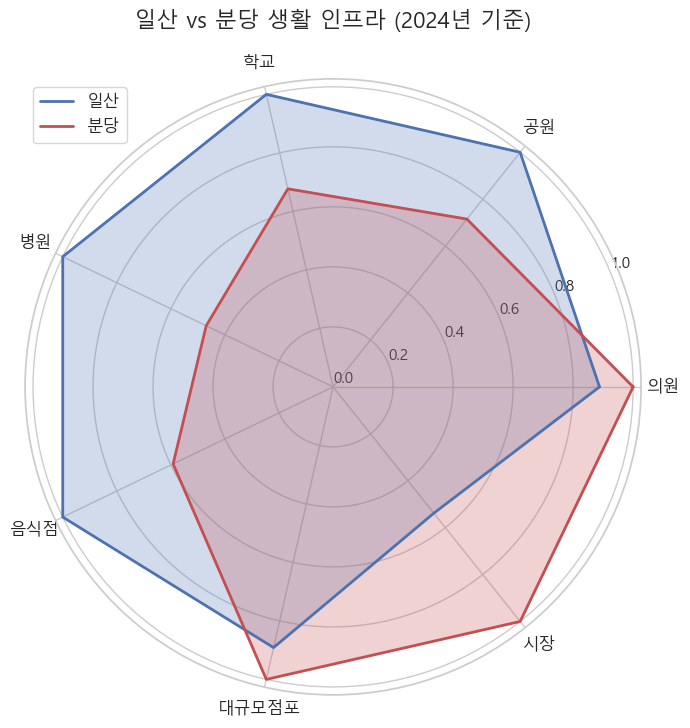

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# 일산과 분당 데이터 (카운트 결과)
ilsan = [
    ilsan_counts['시장'],  
    ilsan_counts['대규모점포'],
    ilsan_counts['음식점'], 
    ilsan_counts['병원'],
    ilsan_counts['학교'],
    ilsan_counts['공원'],
    ilsan_counts['의원']
]

bundang = [
    bundang_counts['시장'],
    bundang_counts['대규모점포'],
    bundang_counts['음식점'], 
    bundang_counts['병원'],
    bundang_counts['학교'],
    bundang_counts['공원'],
    bundang_counts['의원']
]

# 카테고리 역순으로 변경
categories = ['시장', '대규모점포', '음식점', '병원', '학교', '공원', '의원'][::-1]
ilsan = ilsan[::-1]
bundang = bundang[::-1]
# 데이터 정규화
max_values = [max(ilsan[i], bundang[i]) for i in range(len(categories))]
values_ilsan_norm = [value / max_values[i] if max_values[i] != 0 else 0 for i, value in enumerate(ilsan)]
values_bundang_norm = [value / max_values[i] if max_values[i] != 0 else 0 for i, value in enumerate(bundang)]

# 레이더 차트 각도 계산
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]  # 폐곡선 생성

# 정규화 데이터에 폐곡선 추가
values_ilsan_norm += values_ilsan_norm[:1]
values_bundang_norm += values_bundang_norm[:1]

# 레이더 차트 생성
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

# 일산 데이터 추가
ax.plot(angles, values_ilsan_norm, linewidth=2, linestyle='solid', label='일산', color='b')
ax.fill(angles, values_ilsan_norm, alpha=0.25, color='b')

# 분당 데이터 추가
ax.plot(angles, values_bundang_norm, linewidth=2, linestyle='solid', label='분당', color='r')
ax.fill(angles, values_bundang_norm, alpha=0.25, color='r')

# 카테고리 레이블 설정
ax.set_xticks(angles[:-1])  # 마지막 각도 제외
ax.set_xticklabels(categories, fontsize=12)

# y축 눈금 설정
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
#ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=10)

# 제목 및 범례 추가
ax.set_title('일산 vs 분당 생활 인프라 (2024년 기준)', fontsize=16, pad=20)
ax.legend(loc='upper left', fontsize=12)

# 그래프 저장 및 출력
plt.savefig('C:/Users/saeya/Downloads/일산_vs_분당_생활_인프라_2024_수정.png')
plt.show()

In [126]:
print("max_values:", max_values)
print("정규화된 일산 값:", values_ilsan_norm)
print("정규화된 분당 값:", values_bundang_norm)

max_values: [13, 46, 5721, 49, 96, 137, 830]
정규화된 일산 값: [0.5384615384615384, 0.8913043478260869, 1.0, 1.0, 1.0, 1.0, 0.8879518072289156, 0.5384615384615384]
정규화된 분당 값: [1.0, 1.0, 0.5916797762628911, 0.46938775510204084, 0.6770833333333334, 0.7153284671532847, 1.0, 1.0]


In [162]:
def filter_open_close_date(file_path,y):
    df=pd.read_csv(file_path)
    # 인허가일자 
    if '영업상태명' in df.columns:
        df = df[(df['영업상태명'] == '정상영업') | (df['영업상태명'] == '영업개시전') | (df['영업상태명'] == '영업')]
        

    if '상세영업상태명' in df.columns:
        df = df[(df['상세영업상태명'] == '정상영업') | (df['상세영업상태명'] == '영업개시전') | (df['상세영업상태명'] == '영업중') | (df['상세영업상태명'] == '영업')]
        
    if '인허가일자' in df.columns:
        df['인허가일자'] = pd.to_datetime(df['인허가일자'], errors='coerce')  # 날짜 형식
        df = df[df['인허가일자'].dt.year <= y]  # 인허가일자 
        #print(df)
    elif '설립일자' in df.columns:
        #print(df)
        df['설립일자'] = pd.to_datetime(df['설립일자'], errors='coerce')  # 날짜 형식
        df = df[df['설립일자'].dt.year <= y]  # 인허가일자
        #print(df)
    # 폐업일자 
    if '폐업일자' in df.columns:
        df['폐업일자'] = df['폐업일자'].replace("", pd.NaT)  # 빈 문자열을 NaT로
        df['폐업일자'] = pd.to_datetime(df['폐업일자'], errors='coerce')  # 날짜 형식

        # 폐업일자 값이 있는 행만
        df = df[(df['폐업일자'].isna()) | (df['폐업일자'].dt.year > y)]

    return df

find_year_full = 2011

# 폐업일자 2023년과 인허가일자 2024년 제외
ilsan_files_filtered = {key: filter_open_close_date(path,find_year_full) for key, path in ilsan_files.items()}
bundang_files_filtered = {key: filter_open_close_date(path,find_year_full) for key, path in bundang_files.items()}

find_year=8

for key, df in ilsan_files_filtered.items():
    print(f"일산 {key} 데이터 (0{find_year}1231 기준): {len(df)}개   ")
print('\n')
for key, df in bundang_files_filtered.items():
    print(f"분당 {key} 데이터 (0{find_year}1231 기준): {len(df)}개   ")

일산 시장 데이터 (081231 기준): 7개   
일산 대규모점포 데이터 (081231 기준): 24개   
일산 음식점 데이터 (081231 기준): 1818개   
일산 병원 데이터 (081231 기준): 27개   
일산 학교 데이터 (081231 기준): 91개   
일산 공원 데이터 (081231 기준): 137개   
일산 의원 데이터 (081231 기준): 443개   


분당 시장 데이터 (081231 기준): 13개   
분당 대규모점포 데이터 (081231 기준): 38개   
분당 음식점 데이터 (081231 기준): 1367개   
분당 병원 데이터 (081231 기준): 17개   
분당 학교 데이터 (081231 기준): 65개   
분당 공원 데이터 (081231 기준): 98개   
분당 의원 데이터 (081231 기준): 494개   


In [38]:
display(bundang_files_filtered)
    

{'시장':     Unnamed: 0.1  Unnamed: 0 시설구분명                                소재지도로명주소  \
 0              0           0  전통시장  경기도 성남시 분당구 불정로386번길 10 서현동 효자촌미래타운아파트   
 1              1           1  전통시장                 경기도 성남시 분당구 불정로376번길 31   
 2              2           2  전통시장             경기도 성남시 분당구 불정로376번길 37 서현동   
 3              3           3  전통시장                 경기도 성남시 분당구 내정로165번길 38   
 4              4           4  전통시장                경기도 성남시 분당구 내정로 165번길 38   
 5              5           5  전통시장                 경기도 성남시 분당구 수내동 돌마로 361   
 6              6           6  전통시장       경기도 성남시 분당구 내정로174번길 42 파크타운서안아파트   
 7              7           7  전통시장                경기도 성남시 분당구 돌마로 366번길 42   
 8              8           8  전통시장                      경기도 성남시 분당구 야탑로 64   
 9              9           9  전통시장                   경기도 성남시 분당구 돌마로90번길 8   
 10            10          10  전통시장                경기도 성남시 분당구 중앙공원로40번길 42   
 11            11          11  전통시장           

[443, 91, 27, 1818, 24]
[494, 65, 17, 1367, 38]
[0.8967611336032388, 1.0, 1.0, 1.0, 0.631578947368421]


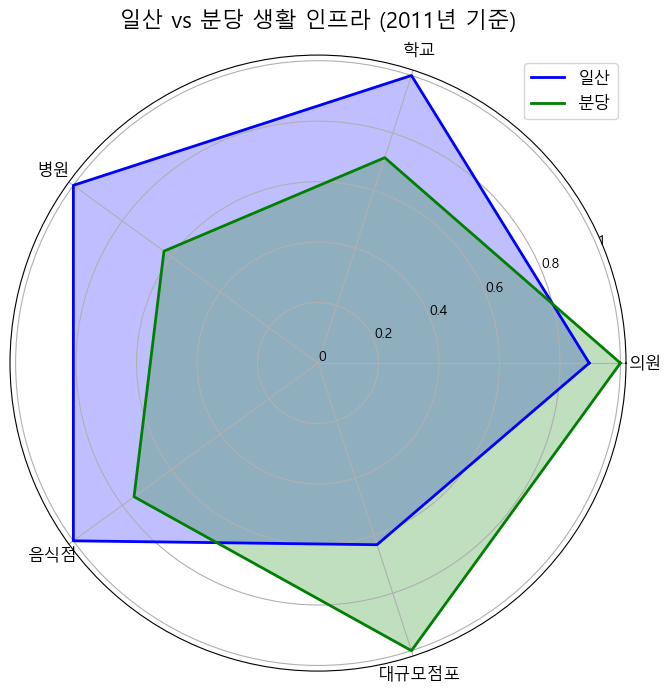

In [164]:

from math import pi

# 카테고리 정의
categories = ['대규모점포', '음식점', '병원', '학교', '의원']
categories = categories[::-1]  # 순서를 반대로

# 개수 계산
ilsan_count = [ilsan_files_filtered[key].shape[0] for key in categories]
bundang_count = [bundang_files_filtered[key].shape[0] for key in categories]
print(ilsan_count)
print(bundang_count)

# 데이터 정규화 (최대값으로 나누기)
max_values = [max(ilsan_count[i], bundang_count[i]) for i in range(len(categories))]
values_ilsan_normalized = [ilsan_count[i] / max_values[i] for i in range(len(categories))]
values_bundang_normalized = [bundang_count[i] / max_values[i] for i in range(len(categories))]

print(values_ilsan_normalized)

# 레이더 차트 각도 설정
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1] 

# 값이 닫히도록 첫 번째 값 복사
values_ilsan_normalized += values_ilsan_normalized[:1]
values_bundang_normalized += values_bundang_normalized[:1]

# 레이더 차트 그리기
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

# 데이터 그리기
ax.plot(angles, values_ilsan_normalized, linewidth=2, linestyle='solid', label='일산', color='b')
ax.fill(angles, values_ilsan_normalized, alpha=0.25, color='b')
ax.plot(angles, values_bundang_normalized, linewidth=2, linestyle='solid', label='분당', color='g')
ax.fill(angles, values_bundang_normalized, alpha=0.25, color='g')

# 카테고리 
ax.set_xticks(angles[:-1]) 
ax.set_xticklabels(categories, fontsize=12)
    
# y축 눈금 설정
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=10)

# 그래프 제목
ax.set_title('일산 vs 분당 생활 인프라 (2012년 기준)', fontsize=16, pad=20)

# 범례
ax.legend(loc='upper right', fontsize=12)

# 그래프 파일로 저장
plt.savefig('C:/Users/saeya/Downloads/일산_vs_분당_생활_인프라_2012년_기준.png')

plt.show()
